# What are the average Airbnb listing prices inNew York City versus Toronto, and how do predictive models perform to predict revenue potential in Toronto and New York City?


# Websites Helpful for XG Boost and Random Forests

https://www.kaggle.com/code/sohamohajeri/house-price-predictions-with-xgboost-regression

https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial

In [ ]:
from google.colab import files
uploaded = files.upload()

import os
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Saving nyc.csv to nyc.csv
Saving toronto.csv to toronto.csv
Current Working Directory: /content


In [ ]:
import pandas as pd

nyc_path = "/content/nyc.csv"  # Change this to the path of the CSV file you want to load
toronto_path = "/content/toronto.csv"

# Load the CSV file into a pandas dataframe
listings_nyc = pd.read_csv(nyc_path)
listings_toronto = pd.read_csv(toronto_path)

# Display the head of the dataframe
print(listings_nyc.head())
print(listings_toronto.head())

                   id                                               name  \
0  977395984065981849      Home in Brooklyn · 1 bedroom · 1 bed · 1 bath   
1  729947657876634696  Rental unit in The Bronx · 1 bedroom · 1 bed ·...   
2  648033676238017128  Rental unit in Bronx · ★4.89 · 1 bedroom · 1 b...   
3  623137142536549768  Rental unit in Brooklyn · 1 bedroom · 1 bed · ...   
4  871990853610302281  Rental unit in Queens · ★New · 1 bedroom · Hal...   

     host_id        host_name neighbourhood_group   neighbourhood   latitude  \
0   95344065            Derek            Brooklyn  Sheepshead Bay  40.591790   
1     566660           Markus               Bronx        Longwood  40.827373   
2  421601513  J Carlos Retals               Bronx     Kingsbridge  40.863940   
3  106442885              Ava            Brooklyn   East New York  40.660730   
4  484563208           Tricia              Queens    Howard Beach  40.663586   

   longitude        room_type  price  minimum_nights  number_o

Drop Unnecessary Columns

In [ ]:
# Drop unnecessary columns from both datasets
columns_to_drop = ['name', 'last_review', 'reviews_per_month', "host_name", "number_of_reviews",'number_of_reviews_ltm']


listings_toronto.drop(columns=columns_to_drop, inplace=True)
listings_nyc.drop(columns=columns_to_drop, inplace=True)

# Check for missing values in both datasets
missing_values_nyc = listings_nyc.isnull().sum()
missing_values_toronto = listings_toronto.isnull().sum()

In [ ]:
#grab without empty values
listings_nyc = listings_nyc[listings_nyc['price'].notna()]
listings_toronto = listings_toronto[listings_toronto['price'].notna()]

In [ ]:
listings_nyc.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,license
0,977395984065981849,95344065,Brooklyn,Sheepshead Bay,40.591790,-73.942850,Private room,30.0,31,7,339,NaN
1,729947657876634696,566660,Bronx,Longwood,40.827373,-73.903147,Private room,29.0,30,2,34,NaN
2,648033676238017128,421601513,Bronx,Kingsbridge,40.863940,-73.903120,Private room,30.0,30,3,359,NaN
3,623137142536549768,106442885,Brooklyn,East New York,40.660730,-73.890500,Entire home/apt,76.0,30,1,364,NaN
4,871990853610302281,484563208,Queens,Howard Beach,40.663586,-73.834532,Private room,85.0,30,2,89,NaN


In [ ]:
listings_toronto.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,license
1,8077.0,22795,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room,100.0,180,2,0,NaN
2,26654.0,113345,NaN,Waterfront Communities-The Island,43.64608,-79.39032,Entire home/apt,145.0,28,5,77,NaN
3,27423.0,118124,NaN,South Riverdale,43.66884,-79.32725,Entire home/apt,75.0,90,1,215,NaN
4,30931.0,22795,NaN,Waterfront Communities-The Island,43.64015,-79.37625,Entire home/apt,134.0,180,2,0,NaN
5,40456.0,174063,NaN,South Parkdale,43.63539,-79.44010,Entire home/apt,150.0,750,4,364,NaN


# Price Analysis

In [ ]:
import pandas as pd
import numpy as np



def calculate_price(df):
    #Number of listings
    num_listings = len(df)
    #print("Number of listings: ", num_listings)

    #Total prices
    total_price = df['price'].sum()
    #print("Total price of all the listings: ", total_price)

    #Average price per listing
    avg_price = total_price / num_listings
    return avg_price

nyc_prices= calculate_price(listings_nyc)
toronto_prices = calculate_price(listings_toronto)

print("Average listing prices in nyc:\n", nyc_prices)
print("Average listing prices in Toronto:\n", toronto_prices)

Average listing prices in nyc:
 206.50294638809908
Average listing prices in Toronto:
 177.03916842422416


In [ ]:


# Take only 10000 samples of data
listings_nyc = listings_nyc.sample(n=10000)
listings_toronto = listings_toronto.sample(n=10000)

# rmove outliers
Q1_nyc = listings_nyc['price'].quantile(0.25)
Q3_nyc = listings_nyc['price'].quantile(0.75)
IQR_nyc = Q3_nyc - Q1_nyc

listings_nyc = listings_nyc[~((listings_nyc['price'] < (Q1_nyc - 1.5 * IQR_nyc)) | (listings_nyc['price'] > (Q3_nyc + 1.5 * IQR_nyc)))]

Q1_toronto = listings_toronto['price'].quantile(0.25)
Q3_toronto = listings_toronto['price'].quantile(0.75)
IQR_toronto = Q3_toronto - Q1_toronto

listings_toronto = listings_toronto[~((listings_toronto['price'] < (Q1_toronto - 1.5 * IQR_toronto)) | (listings_toronto['price'] > (Q3_toronto + 1.5 * IQR_toronto)))]


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.6 MB/s eta 0:00:00


# Random Forests for NYC


In [ ]:

import numpy as np
import category_encoders as ce
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Prepare data
listings_nyc = listings_nyc[listings_nyc['price'].notna()]

X = listings_nyc[['neighbourhood_group', 'neighbourhood',  'room_type', 'minimum_nights', 'availability_365']]
y = listings_nyc['price']

# Encode categorical features
encoder = ce.OneHotEncoder(cols=['neighbourhood_group', 'neighbourhood',  'room_type'])
X_encoded = encoder.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance
score = model.score(X_test, y_test)
print("R^2 score:", score)

# Make predictions
y_pred = model.predict(X_test)

# Calculate mean absolute error
mae = np.mean(np.abs(y_pred - y_test))
print("Mean absolute error:", mae)


R^2 score: 0.32696173140572116
Mean absolute error: 51.055819238460124


# Random Forests for Toronto


In [ ]:

import numpy as np
import category_encoders as ce
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Prepare data
listings_toronto = listings_toronto[listings_toronto['price'].notna()]

X = listings_toronto[['neighbourhood',  'room_type', 'minimum_nights', 'availability_365']]
y = listings_toronto['price']

# Encode categorical features
encoder = ce.OneHotEncoder(cols=['neighbourhood',  'room_type'])
X_encoded = encoder.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance
score = model.score(X_test, y_test)
print("R^2 score:", score)

# Make predictions
y_pred = model.predict(X_test)

# Calculate mean absolute error
mae = np.mean(np.abs(y_pred - y_test))
print("Mean absolute error:", mae)

R^2 score: 0.31422288548727784
Mean absolute error: 51.18393402942255


# XG Boost Regression

In [ ]:
import category_encoders as ce



nyc_columns_to_encode = ['neighbourhood_group', 'neighbourhood', 'room_type', 'license']



# Initialize the OrdinalEncoder nyc
encoder1 = ce.OrdinalEncoder(cols=nyc_columns_to_encode)

encoded_nyc = encoder1.fit_transform(listings_nyc)

encoded_nyc.head()



,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,license
13906,12827964,65357,1,1,40.664240,-73.979920,1,99.0,30,1,228,479
32236,982538549794964539,381698920,2,2,40.754696,-73.996164,2,257.0,1,28,270,1
38070,764509534515516743,488495961,3,3,40.763810,-73.927810,2,185.0,2,1,49,2
35381,890116632523721018,397598833,1,4,40.689730,-73.945820,2,40.0,30,11,151,479
35414,713920711978791782,347502164,1,5,40.690071,-73.919644,1,105.0,30,5,341,479


In [ ]:
toronto_columns_to_encode = ['neighbourhood', 'room_type', 'license']
# Initialize the OrdinalEncoder tor
encoder2 = ce.OrdinalEncoder(cols=toronto_columns_to_encode)

encoded_tor = encoder2.fit_transform(listings_toronto)

encoded_tor.head()



,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,license
9640,5.265970e+07,785826,NaN,1,43.64227,-79.37977,1,90.0,30,33,32,3959
17100,9.601710e+17,72887253,NaN,2,43.66545,-79.30479,1,330.0,5,1,267,1
11452,6.797030e+17,442847620,NaN,3,43.63878,-79.40169,2,140.0,28,2,364,2
5086,2.801296e+07,85473145,NaN,4,43.66258,-79.44867,2,100.0,2,6,90,3
19732,1.044370e+18,550361796,NaN,5,43.67604,-79.39904,1,100.0,30,3,364,3959


In [ ]:
price_cor_nyc = encoded_nyc.corr()['price'].sort_values(ascending=False).drop('price')

print(price_cor_nyc)

calculated_host_listings_count    0.145237
id                                0.056743
availability_365                  0.051843
latitude                          0.031106
host_id                          -0.010516
neighbourhood                    -0.085965
neighbourhood_group              -0.090833
minimum_nights                   -0.100005
license                          -0.197438
longitude                        -0.228631
room_type                        -0.425960
Name: price, dtype: float64


In [ ]:
price_cor_tor = encoded_tor.corr()['price'].sort_values(ascending=False).drop('price')

print(price_cor_tor)

id                                0.023440
longitude                         0.008284
availability_365                  0.004507
host_id                          -0.014851
minimum_nights                   -0.053365
calculated_host_listings_count   -0.097868
license                          -0.120708
neighbourhood                    -0.155897
latitude                         -0.266332
room_type                        -0.493611
neighbourhood_group                    NaN
Name: price, dtype: float64


# Correlation Features For NYC

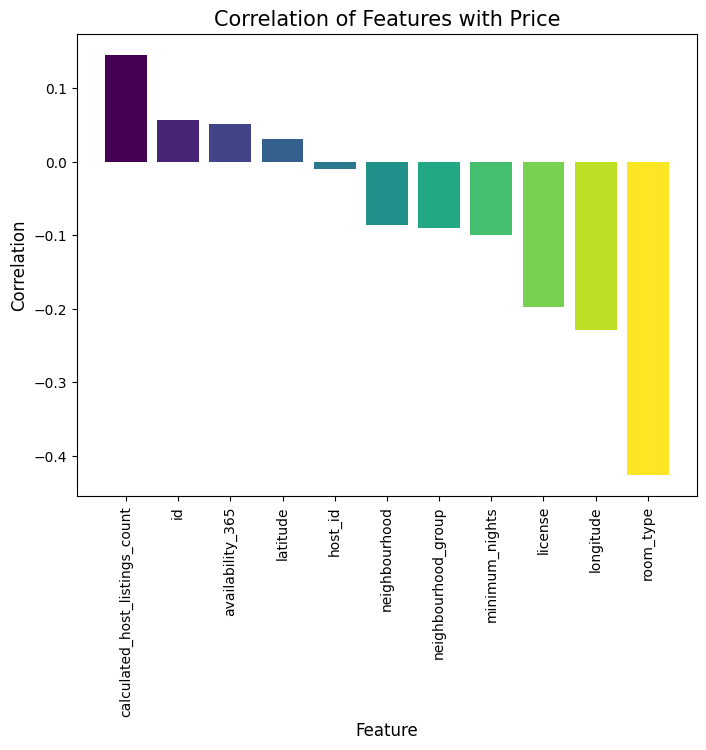

In [ ]:
import matplotlib.pyplot as plt

colors = plt.cm.viridis(np.linspace(0, 1, len(price_cor_nyc)))


plt.figure(figsize=(8,6))
plt.bar(x=list(price_cor_nyc.index), height=list(price_cor_nyc.values), color=colors)
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Price', fontsize=15)
plt.show()

# Correlation Features For Toronto

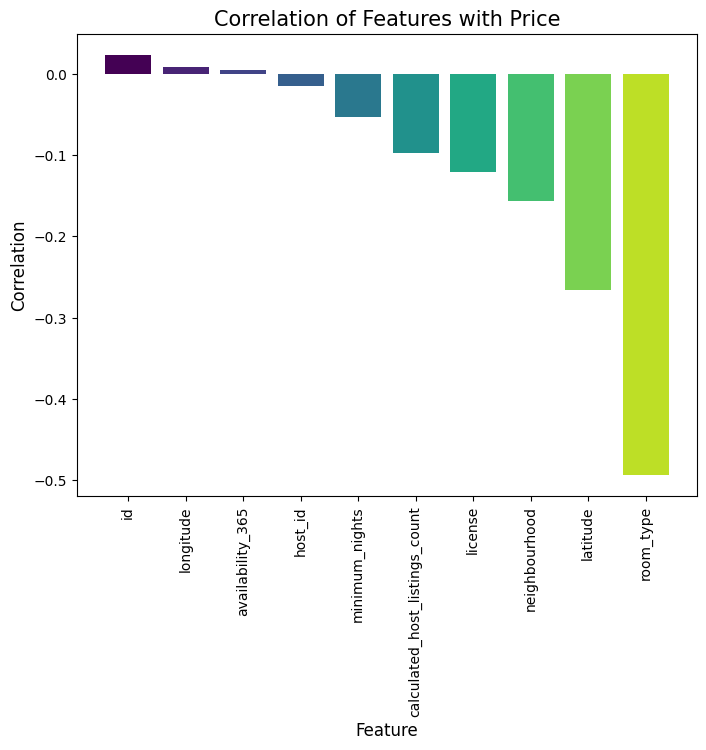

In [ ]:
import matplotlib.pyplot as plt

colors = plt.cm.viridis(np.linspace(0, 1, len(price_cor_nyc)))


plt.figure(figsize=(8,6))
plt.bar(x=list(price_cor_tor.index), height=list(price_cor_tor.values), color=colors)
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Price', fontsize=15)
plt.show()

# XG boost NYC

In [ ]:
import xgboost as xgb

X=encoded_nyc[['room_type', 'neighbourhood', 'neighbourhood_group', 'availability_365', 'calculated_host_listings_count', 'minimum_nights']]
y=encoded_nyc['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgbr= xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=6)
xgbr.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn import metrics

prediction_xgbr=xgbr.predict(X_test)

print('RMSE =', np.sqrt(metrics.mean_squared_error(y_test,prediction_xgbr)))
print('R2=',metrics.r2_score(y_test,prediction_xgbr))

RMSE = 61.283524380582534
R2= 0.49452545095618394


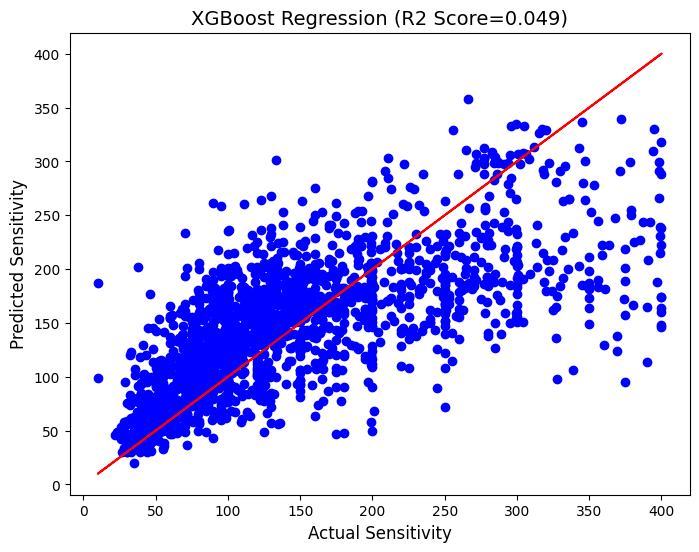

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=prediction_xgbr, color='blue')
plt.plot(y_test,y_test, color='red')
plt.xlabel('Actual Sensitivity',fontsize=12)
plt.ylabel('Predicted Sensitivity',fontsize=12)
plt.title('XGBoost Regression (R2 Score=0.049)',fontsize=14)
plt.show()

# XG Boost Toronto

In [ ]:
import xgboost as xgb

X=encoded_tor[['room_type', 'neighbourhood_group', 'availability_365', 'calculated_host_listings_count', 'minimum_nights']]
y=encoded_tor['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgbr= xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=6)
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn import metrics

prediction_xgbr=xgbr.predict(X_test)

print('RMSE =', np.sqrt(metrics.mean_squared_error(y_test,prediction_xgbr)))
print('R2=',metrics.r2_score(y_test,prediction_xgbr))

RMSE = 59.81874851669572
R2= 0.3843153960826706


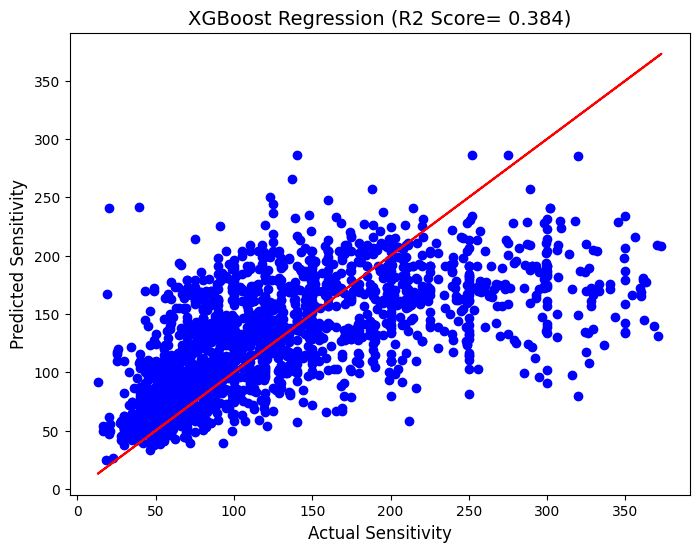

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=prediction_xgbr, color='blue')
plt.plot(y_test,y_test, color='red')
plt.xlabel('Actual Sensitivity',fontsize=12)
plt.ylabel('Predicted Sensitivity',fontsize=12)
plt.title('XGBoost Regression (R2 Score= 0.384)',fontsize=14)
plt.show()
